In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !unzip "drive/MyDrive/dog-breed/dog-breed-identification.zip" -d "drive/MyDrive/dog-breed/"

## **Dog breed classification 🐕🐩**

### Problem
Multiclass classification

**Unstructured Data**

### Data Source
[dog_breed_identification / Kaggle](https://www.kaggle.com/competitions/dog-breed-identification)

## Workspace

In [3]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
print(hub.__version__)

2.12.0
0.14.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("drive/MyDrive/dog-breed/labels.csv")
data.head

<bound method NDFrame.head of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

In [44]:
df = pd.DataFrame(data)
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<Axes: >

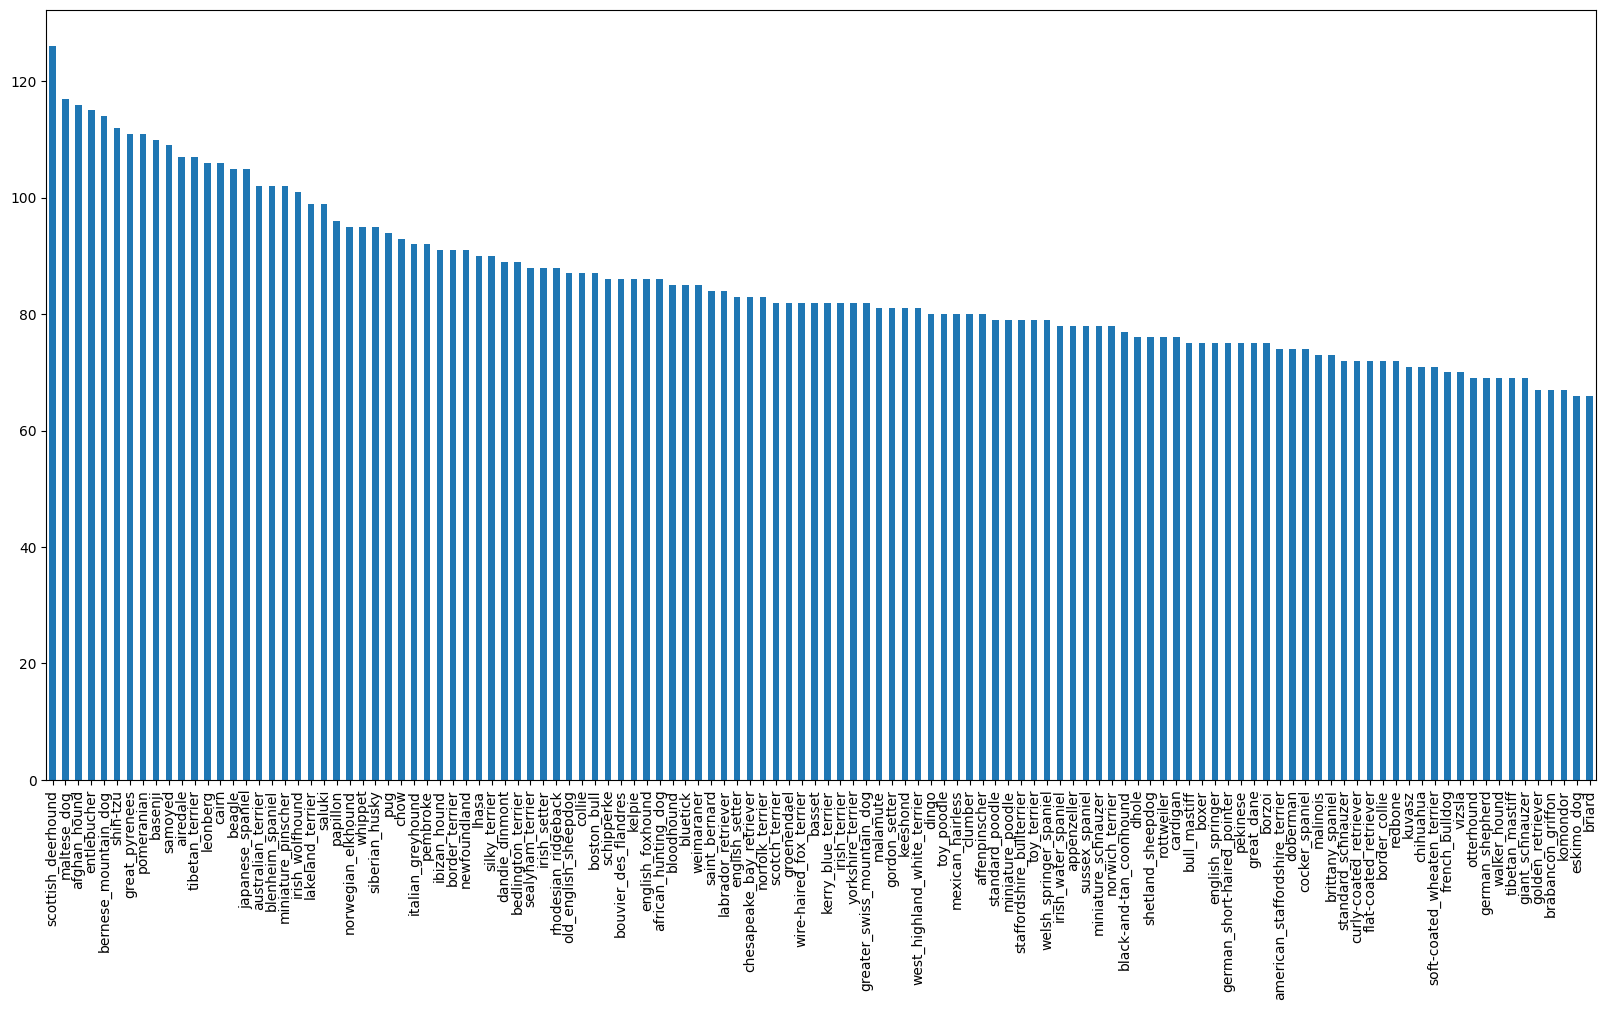

In [46]:
df.breed.value_counts().plot.bar(figsize = (20,10))

In [47]:
df.breed.value_counts().median()

82.0

#### Viewing an Image

In [48]:
from IPython.display import Image


In [49]:
# Image('drive/MyDrive/dog-breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [50]:
# Creating pathnames for every images

filenames = ['drive/MyDrive/dog-breed/train/' + fname + '.jpg' for fname in df.id]
filenames[:10]

['drive/MyDrive/dog-breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog-breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog-breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog-breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog-breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog-breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog-breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog-breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog-breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog-breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [51]:
import os
len(filenames) == len(os.listdir('drive/MyDrive/dog-breed/train/'))

True

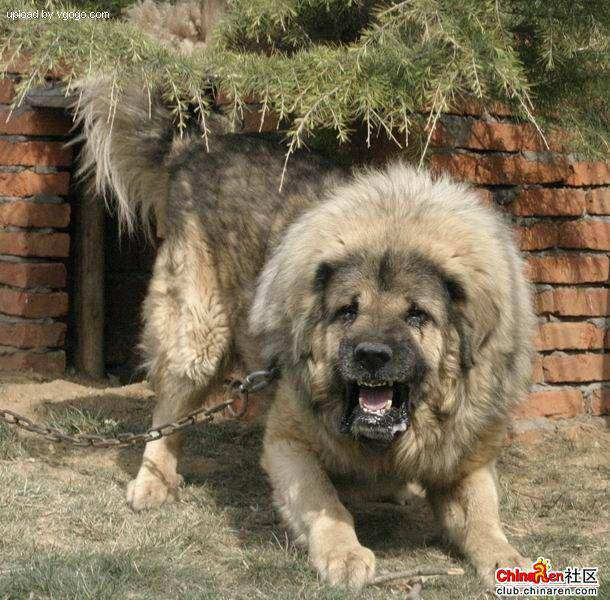

In [52]:
Image(filenames[9000])


In [53]:
df['breed'][9000]

'tibetan_mastiff'

### We are working on unstructured data i.e Binary data (Images).


In [54]:
breed_array = data.breed.to_numpy()
breed_array

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [55]:
len(breed_array)

10222

In [56]:
unique_breeds = np.unique(breed_array)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [41]:
len(np.unique(breed_array))

120

In [42]:
# Turn every data into a boolean array
# boolean_label = [everydata == unique_breeds for everydata in breed_array]
# boolean_label[:2]

# Alternative
boolean_label = []
for data in breed_array:
  boolean_label.append(data == np.array(unique_breeds))

In [43]:
 len(boolean_label)

10222

In [44]:
print(breed_array[1])
print(boolean_label[1])
print(boolean_label[1].argmax())
print(boolean_label[1].astype(int))

dingo
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
37
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating Validation set

In [ ]:
X = filenames
y = boolean_label

In [ ]:
len(y)

10222

In [ ]:
# Starting off with ~1000 images

num_images = 1000 #@param {type:'slider', min:1000, max:10000, step:100}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:num_images],
                                                 y[:num_images],
                                                 train_size = 0.75,
                                                 random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)


(750, 750, 250, 250)

### Funtion to preprocess images
1. Take image filepath as input
2. Use TensorFlow to read the file and save it to a variable, 'image'
3. Turn 'image' into tensors
4. Normalize image (convert color channel values from 0-255 to 0-1)
5. Resize the 'image' to be a shape of (244, 244)
6. Return the modified 'image'

In [6]:
image_size = 224

def process_img(image_path, img_size = image_size):
  """
  Takes an image file path and turns the image into a Tensor
  """

  # Read an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 colour channels R, G, B
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  #Resize the image to our desired value (244, 224)
  image = tf.image.resize(image, size=[224, 224])

  return image

### Turning data into batches
we turn data into batches because all of the data might not fit into the memory at once. 32 is a default size

In order to use TensorFlow effectively, we nee data in the form of Tensor tuples which look like (image, label)

In [8]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and return a tuple of (image, label)
  """
  image = process_img(image_path)
  return image, label

In [9]:
batchsize = 32

# Creating a function to turn data into batches
def create_data_batches(X, y = None, batch_size = batchsize, test_data = False, valid_data = False):
  """
  Creates batches of data out of image X and label y pairs.
  Shuffles the data if it's training data but doesnot shuffle if it validation data.
  Also accepts test data as input (which has no labels)
  """

  # If the data is test dataset, we wont have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths, no labels
    data_batch = data.map(process_img).batch(batchsize)
    return data_batch

  # If the data is validation dataset, we will have labels
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filenames
                                                tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batchsize) # here, get_image_label function is used because we have processed (filenames, labels) in this function.
    return data_batch

  # If the data is training dataset, we will have labels. Also we need to shuffle the data
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
    # Shuffling the data
    data = data.shuffle(buffer_size = len(X)) # because we want to shuffle all of the training data
    data_batch = data.map(get_image_label).batch(batchsize)
  return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """

  # Setup the figure
  plt.figure(figsize = (10, 10))

  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as title
    plt.title(unique_breeds[labels[i].argmax()])

    #Turn the grid lines off
    plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

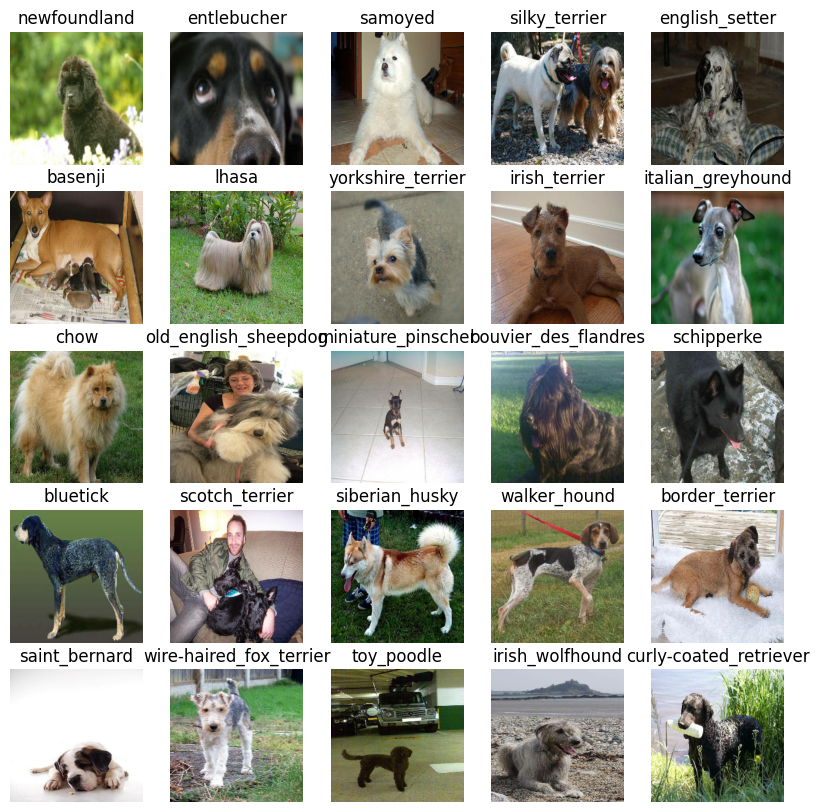

In [ ]:
show_25_images(train_images, train_labels)

In [ ]:
train_data.element_spec
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

### Defining Input and output shape and building a model

In [ ]:
inp_shape = [None, image_size, image_size, 3] #batchsize, height, width, colour channel
out_shape = len(unique_breeds) # length of label

model_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'



Now we've got our inputs, outputs and models ready to go.
Let's put them together into a keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosed as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, than that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape = inp_shape, output_shape = out_shape, model_url = model_URL):
  print(" Building model with", model_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), #Layer 1 (input layer)
      tf.keras.layers.Dense(units = out_shape,
                            activation = "softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(inp_shape)

  return model


In [ ]:
model = create_model()
model.summary()

 Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Setting Callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps tracks our models progress and another for early stopping which prevents our model from training for too long.


#### Tensorboard callback
To setup a tensorboard callback, we need to do 3 things.
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

# fucntion to build a TensorBoard callback
def create_tensorboard_callback():

  # create a log directory to store tensorboard logs
  logdir = os.path.join("drive/MyDrive/dog-breed/logs",
                        # to track whenever this experiment is run
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
                        # strftime - string from time

  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping callback

helps stop our model from overfitting by stopping training if a certain evaluation metric stop stops improving.



In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

### Setting Epochs

In [ ]:
no_epoch = 100 #@param {type : "slider", min : 10, max : 100, steps : 10}

## combining all of the above functions to train the model
* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train
* Return the model


In [ ]:
# Function to train and return the trained model
def train_model():
  """
  Trains the given model and returns the trained version
  """

  # Create model
  model = create_model()

  # Create new Tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks created above
  model.fit(x = train_data,
            epochs = no_epoch,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])

  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

 Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
24/24 [==============================] - 135s 5s/step - loss: 4.5966 - accuracy: 0.1133 - val_loss: 3.5198 - val_accuracy: 0.2720
Epoch 2/100
24/24 [==============================] - 4s 147ms/step - loss: 1.6566 - accuracy: 0.6893 - val_loss: 2.3619 - val_accuracy: 0.4560
Epoch 3/100
24/24 [==============================] - 4s 179ms/step - loss: 0.5799 - accuracy: 0.9413 - val_loss: 1.8931 - val_accuracy: 0.5120
Epoch 4/100
24/24 [==============================] - 4s 158ms/step - loss: 0.2538 - accuracy: 0.9893 - val_loss: 1.7316 - val_accuracy: 0.5800
Epoch 5/100
24/24 [==============================] - 3s 127ms/step - loss: 0.1443 - accuracy: 0.9973 - val_loss: 1.6589 - val_accuracy: 0.5920
Epoch 6/100
24/24 [==============================] - 4s 153ms/step - loss: 0.0986 - accuracy: 1.0000 - val_loss: 1.6133 - val_accuracy: 0.6200
Epoch 7/100
24/24 [==============================]

### Checking tensorflow logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents

In [ ]:
# %tensorboard --logdir drive/MyDrive/dog-breed/logs

In [ ]:
predictions = model.predict(val_data)

8/8 [==============================] - 2s 98ms/step


In [ ]:
index = 2
print(f"maximum value is : {np.max(predictions[index])}")
print(f"max index {np.argmax(predictions[index])}")
print(f"Breed is {unique_breeds[np.argmax(predictions[index])]}")


maximum value is : 0.9733456373214722
max index 8
Breed is basset


In [ ]:
def get_pred_label(index):
  return unique_breeds[np.argmax(index)]

In [ ]:

def unbatchify(data):
  images = []
  labels = []
  for image, label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)

### Visualization

Now we got prediction labels, validation labels(true labels) and validation images,
Let's make some function to make these all a bit more presentable.

Function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images.
* A integer which represents the index of prediction (n)
* Convert the prediction probabilities to labels
* Plot all of them

In [ ]:
def predic(prediction_probabilities, truth_label, images, n):


  confidence_level = prediction_probabilities[n]
  true_label = truth_label[n]
  image = images[n]

  pred_label = get_pred_label(confidence_level)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    colour = 'green'
  else:
    colour = 'red'

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                  np.max(confidence_level)*100,
                                  true_label),

                                  color = colour)

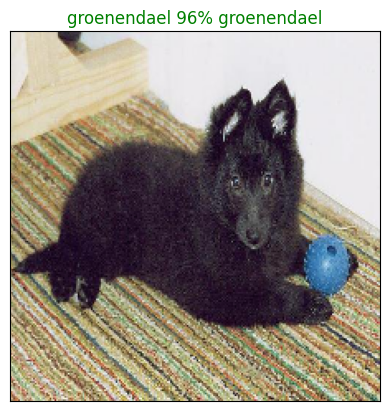

In [ ]:

predic(predictions, val_labels, val_images, 77)

Another function to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities(confidence level) array and a truth array and a integer
* Find the prediciton using get_pred_label()
* FInd the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction lables
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the prediction label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1 ] # argsort() arrages values of array in ascending order inside the index of pred_prob
                                                    # [-10:] last 10 in ascending order means the greatest 10 values
                                                    # [::-1] reciprocals the obtained values(i.e ascending to descending)

  # Find top 10  prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setting up a plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')

  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = 'vertical')

  # change the colour of the label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


In [ ]:
unique_breeds[[predictions[0].argsort()[-10:][::-1 ]]]


<ipython-input-52-2112c3c68794>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  unique_breeds[[predictions[0].argsort()[-10:][::-1 ]]]


array(['cairn', 'border_terrier', 'komondor', 'australian_terrier',
       'silky_terrier', 'tibetan_terrier', 'otterhound',
       'irish_wolfhound', 'lhasa', 'soft-coated_wheaten_terrier'],
      dtype=object)

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.28631774, 0.17930435, 0.15752965, 0.04592087, 0.04114924,
       0.04095467, 0.03754495, 0.03007073, 0.02572894, 0.01827779],
      dtype=float32)

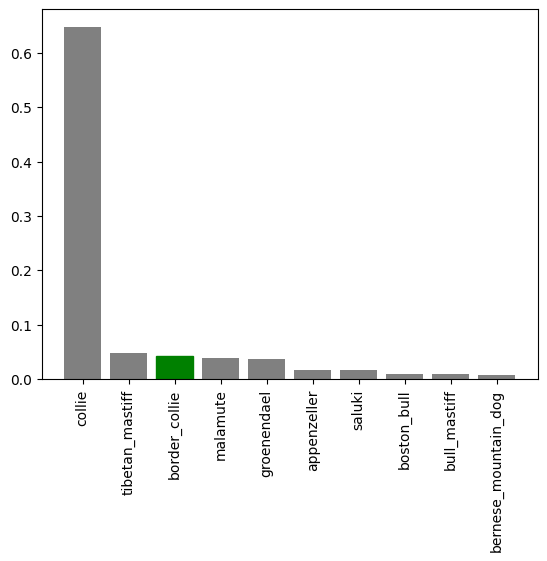

In [ ]:
plot_pred_conf(prediction_probabilities = predictions, labels = val_labels, n = 9)

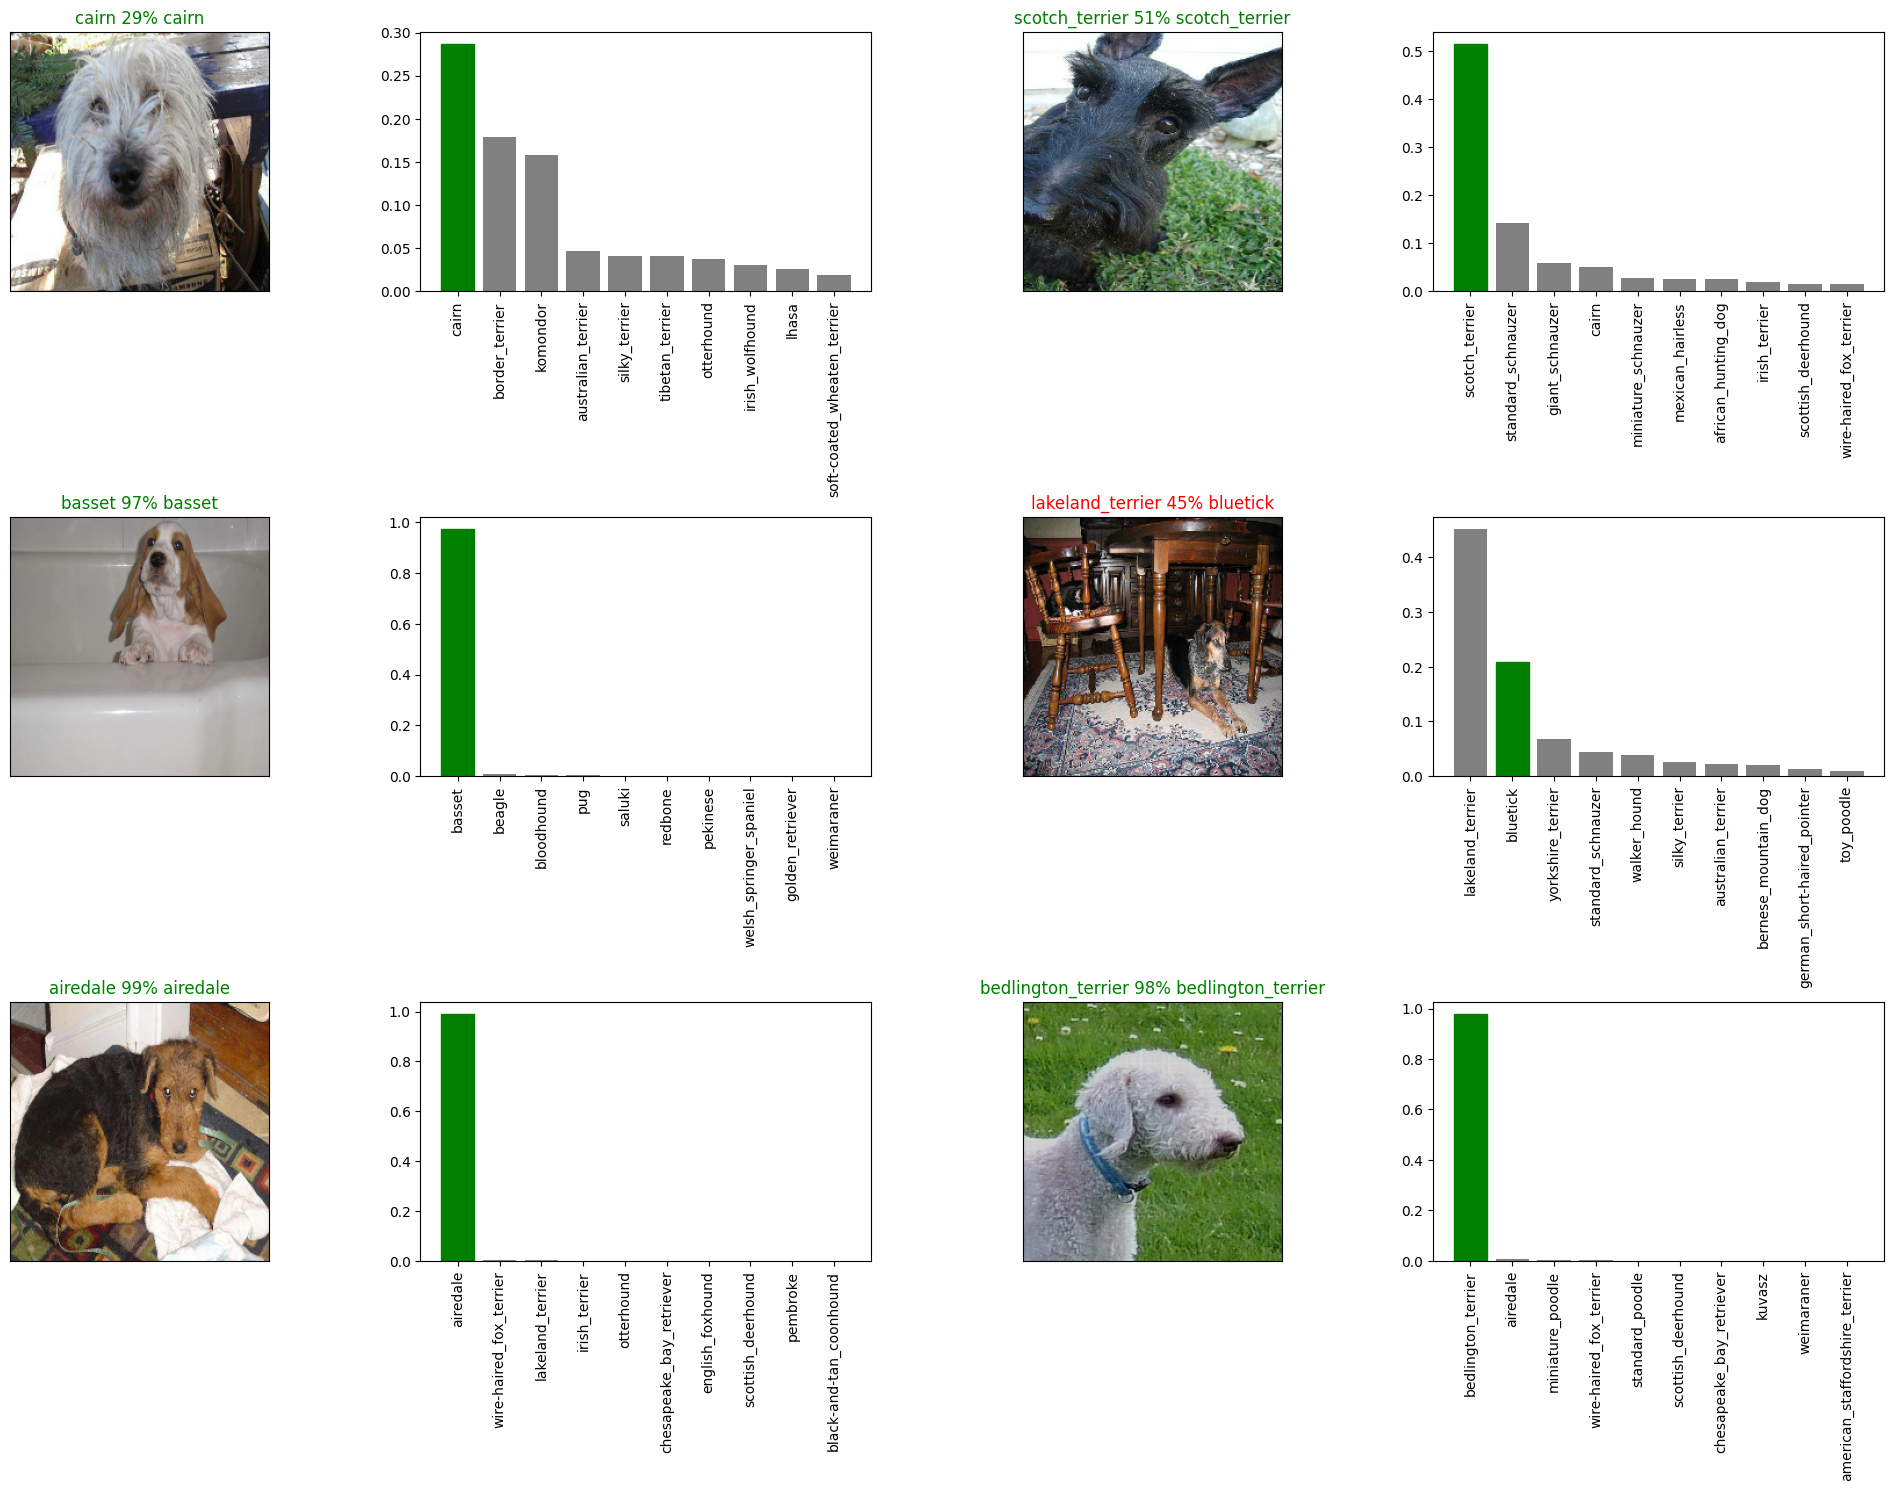

In [ ]:
# Checking out few predictions and their different values

i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  predic(prediction_probabilities = predictions,
           truth_label = val_labels,
           images = val_images,
           n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
val_labels

In [ ]:
z = []
for n in predictions:
  a = get_pred_label(n)
  z.append(a)

In [ ]:
z

In [ ]:
confusion_matrix(val_labels, z)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
val_labels

### Saving the model

In [ ]:
# Function to save the model
def save_model(model, suffix = None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """

  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/dog-breed/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of the model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [39]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Load the saved model
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# saving model which is trained on 1000 images
save_model(model, suffix = "1000-images-mobilenetv2-Adam-softmax")


Saving model to: drive/MyDrive/dog-breed/models/20230729-143222-1000-images-mobilenetv2-Adam-softmax.h5...


'drive/MyDrive/dog-breed/models/20230729-143222-1000-images-mobilenetv2-Adam-softmax.h5'

In [ ]:
# Loading a trained model
trained_model = load_model("drive/MyDrive/dog-breed/models/20230729-065459-1000-images-mobilenetv2-Adam-softmax.h5")

Loading saved model from: drive/MyDrive/dog-breed/models/20230729-065459-1000-images-mobilenetv2-Adam-softmax.h5


In [ ]:
model.evaluate(val_data)

8/8 [==============================] - 1s 92ms/step - loss: 1.5102 - accuracy: 0.6320


[1.510152816772461, 0.6320000290870667]

In [ ]:
trained_model.evaluate(val_data)

8/8 [==============================] - 2s 143ms/step - loss: 1.5288 - accuracy: 0.6080


[1.5287708044052124, 0.6079999804496765]

#### Since both of the above models have same evaluation, our model is safely saved

### Training full dataset

In [ ]:
# Data to batches
full_data = create_data_batches(X = X ,y = y , batch_size = 32)

# callbacks
full_model_tensorboard, full_model_earlystopping = create_tensorboard_callback(), tf.keras.callbacks.EarlyStopping(monitor = "accuracy", patience = 5)




Creating training data batches...


In [ ]:
# create_model
full_model = create_model()

# fit into the model
full_model.fit(x = full_data,
               epochs = 100,
               callbacks = [full_model_tensorboard, full_model_earlystopping]
               )

In [ ]:
save_model(full_model, suffix = "full_model-mobilenetv2-Adam-softmax")

Saving model to: drive/MyDrive/dog-breed/models/20230729-150935-full_model-mobilenetv2-Adam-softmax.h5...


'drive/MyDrive/dog-breed/models/20230729-150935-full_model-mobilenetv2-Adam-softmax.h5'

In [40]:
loaded_full_model = load_model('drive/MyDrive/dog-breed/models/20230729-150935-full_model-mobilenetv2-Adam-softmax.h5')

Loading saved model from: drive/MyDrive/dog-breed/models/20230729-150935-full_model-mobilenetv2-Adam-softmax.h5


## Predicting test datasets

In [8]:
import os
test_filenames = os.listdir('drive/MyDrive/dog-breed/test/')

In [9]:
test_files = ['drive/MyDrive/dog-breed/test/' + fname for fname in test_filenames]

In [ ]:
test_files

In [15]:
test_batches = create_data_batches(X = test_files, batch_size = 32, test_data = True)

Creating test data batches...


In [17]:
predictions_test = loaded_full_model.predict(test_batches)

324/324 [==============================] - 37s 114ms/step


In [20]:
np.savetxt("drive/MyDrive/dog-breed/preds_array.csv", predictions_test, delimiter = ',')

In [21]:
predictions_test = np.loadtxt("drive/MyDrive/dog-breed/preds_array.csv", delimiter = ',')

In [23]:
predictions_test.shape

(10357, 120)

### Preparing test dataset as asked in kaggle

In [63]:
preds_df = pd.DataFrame(columns =["id"] + list(unique_breeds))

In [64]:
preds_df


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [115]:
test_ids = [os.path.splitext(path)[0] for path in test_filenames]

In [ ]:
test_ids

In [117]:
preds_df['id'] = test_ids

In [118]:
preds_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e1fa4eb8a57184773ac11efe0de11e92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,de6cc38e54a460dd34c53b74f022a8da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e021107c3f07749e5f5b389e57e21ded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e1cfddc1d5315f1dba011c6152822786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e5fa615e36dc3b2b3f554aa5097a6ece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,0763ebab76bfd9cbfaac696cc604d35e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10353,077b4c62007a362be52711169abfa4fd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10354,076bc1ea1425b47d2ed010c3fb3d8617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10355,07be196f3517e9afe16c0ddc61824628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
preds_df[list(unique_breeds)] = predictions_test

In [122]:
preds_df.T

,0,1,2,3,4,5,6,7,8,9,...,10347,10348,10349,10350,10351,10352,10353,10354,10355,10356
id,e1fa4eb8a57184773ac11efe0de11e92,de6cc38e54a460dd34c53b74f022a8da,e021107c3f07749e5f5b389e57e21ded,e1cfddc1d5315f1dba011c6152822786,e5fa615e36dc3b2b3f554aa5097a6ece,deaf748bed865ec76758f086db04bfac,e26d745f820e6b14cae26bb5def0648f,dd026c42cfd91ea64b1fe5db04a18863,e06ce40d62d3d198f2df70349104a002,df58b248e14af15c43fb4a3ebc00e9a3,...,0910c194c44f79721d282c8416016dab,092b3603e559d05e09e226b56bf5f788,084a88db5888d01ee4cdc4607f461ee5,07cbc12094a8f4a54700054222a25da3,08699bdbc18bde158cdc4969b6c51d81,0763ebab76bfd9cbfaac696cc604d35e,077b4c62007a362be52711169abfa4fd,076bc1ea1425b47d2ed010c3fb3d8617,07be196f3517e9afe16c0ddc61824628,08d5f16507943be640f4592c9d08a798
affenpinscher,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999675,0.00034,0.000013
afghan_hound,0.0,0.0,0.0,0.0,0.0,0.999943,0.0,0.0,0.000001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.0,0.0,0.0
african_hunting_dog,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001
airedale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
welsh_springer_spaniel,0.0,0.000091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
west_highland_white_terrier,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
whippet,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,...,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000008,0.0
wire-haired_fox_terrier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001


In [123]:
preds_df.to_csv("drive/MyDrive/dog-breed/full_model_predictions_submission_mobilenetv2.csv",
                index = False)

In [32]:
import os
na = [os.path.splitext(path)[0] for path in os.listdir('drive/MyDrive/dog-breed/')][-3:]

In [107]:
os.listdir('drive/MyDrive/dog-breed/')[-3:][::-1]

['d1.jpg', 'd2.jpg', 'd3.jpg']

In [111]:
fn = ['drive/MyDrive/dog-breed/' + nam for nam in os.listdir('drive/MyDrive/dog-breed/')[-3:][::-1]]

In [112]:
fn

['drive/MyDrive/dog-breed/d1.jpg',
 'drive/MyDrive/dog-breed/d2.jpg',
 'drive/MyDrive/dog-breed/d3.jpg']

In [113]:
tt = create_data_batches(fn, 32, test_data = True)

Creating test data batches...


In [114]:
tt_predictions = loaded_full_model.predict(tt, verbose = 1)

1/1 [==============================] - 1s 938ms/step


In [115]:
a = []
for i in range(len(tt_predictions)):
  a.append(unique_breeds[np.argmax(tt_predictions[i])])

In [116]:
a

['blenheim_spaniel', 'eskimo_dog', 'bedlington_terrier']

In [118]:
custom_images = []

for image in tt.unbatch().as_numpy_iterator():
  custom_images.append(image)

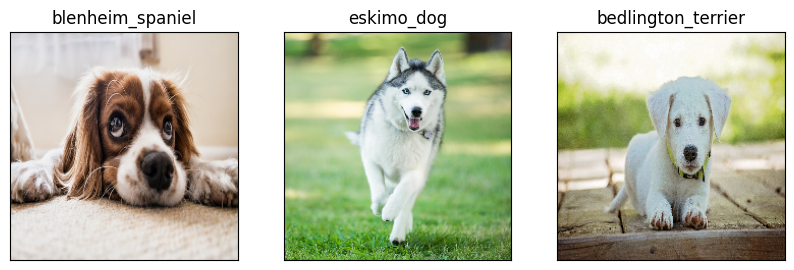

In [126]:
plt.figure(figsize = (10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(a[i])
  plt.imshow(image)
